# Support Vector Machines (Non-Linear)
Support Vector Machines (SVMs) are powerful supervised learning models used for both classification and regression tasks. 
They aim to find the optimal hyperplane that maximizes the margin between data points of different classes. This notebook demonstrates the implementation of a non-linear SVM using the Radial Basis Function (RBF) kernel. The RBF kernel allows SVMs to handle datasets that are not linearly separable in their original feature space.



#### Loading and Preprocessing the Dataset

We start by importing the necessary libraries and loading the dataset. The features and labels are extracted, and the labels 
are converted to +1 and -1 as required for SVM training.


In [22]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(r"C:\Users\arsha\OneDrive - Manipal Academy of Higher Education\Desktop\Cryptonite\Sample_Datasets\svm_nonlinear_data.csv")
X = data[['Feature_1', 'Feature_2']].values
y = data['Class'].values
y = np.where(y == 1, 1, -1)  



#### Defining the RBF Kernel

The RBF kernel computes the similarity between two data points using the formula:

$$ K(x_1, x_2) = \exp\left(-\frac{||x_1 - x_2||^2}{2\sigma^2}\right) $$

This function will be used later to compute the Gram matrix for the dataset.


In [23]:

def rbf_kernel(x1, x2, sigma=1.0):
    return np.exp(-np.linalg.norm(x1 - x2)**2 / (2 * (sigma ** 2)))



#### Computing the Gram Matrix

The Gram matrix contains the pairwise kernel evaluations for the dataset. This matrix plays a central role 
in the optimization process of SVMs.


In [24]:

def compute_gram_matrix(X, sigma=1.0):
    m = X.shape[0]
    K = np.zeros((m, m))
    for i in range(m):
        for j in range(m):
            K[i, j] = rbf_kernel(X[i], X[j], sigma)
    return K



#### Training the SVM

The SVM is trained using a dual optimization approach. The optimization adjusts the Lagrange multipliers $ \alpha $ 
and the bias term $ b $ to maximize the margin between the two classes. The learning rate, regularization parameter $ C $, 
and the kernel parameter $ \sigma $ control the training process.


In [25]:

def train_svm(X, y, C=1.0, sigma=1.0, lr=0.001, epochs=1000):
    m, n = X.shape
    alpha = np.zeros(m)
    b = 0
    K = compute_gram_matrix(X, sigma)
    for epoch in range(epochs):
        for i in range(m):
            prediction = np.sum(alpha * y * K[:, i]) + b
            if y[i] * prediction < 1:
                alpha[i] += lr * (1 - y[i] * prediction)
                alpha[i] = min(max(alpha[i], 0), C)
                b += lr * y[i]
    return alpha, b

alpha, b = train_svm(X, y, C=1.0, sigma=0.5, lr=0.001, epochs=1000)



#### Prediction Function

To make predictions, we calculate the decision boundary using the learned Lagrange multipliers \( \alpha \), bias \( b \), 
and the RBF kernel. The decision boundary separates the two classes in the feature space.


In [26]:

def predict(X_train, y_train, alpha, b, X_test, sigma=1.0):
    K_test = np.array([np.sum(alpha * y_train * [rbf_kernel(x, x_train, sigma) for x_train in X_train]) for x in X_test])
    return np.sign(K_test + b)



### Results: Visualizing the Decision Boundary

We visualize the decision boundary by evaluating the prediction function over a grid of points. The plot shows 
the regions corresponding to the two classes, as well as the original data points.


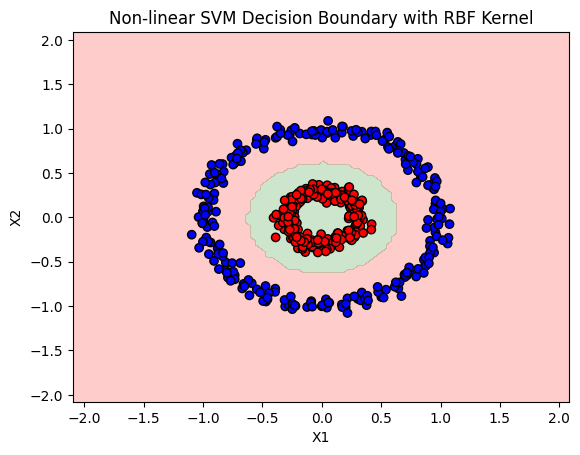

In [27]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = predict(X, y, alpha, b, grid, sigma=0.5)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.2, colors=['red', 'green'])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Non-linear SVM Decision Boundary with RBF Kernel')
plt.show()


## Theory for Kernels

Kernel theory is a fundamental concept in mathematics, particularly in linear algebra, functional analysis, and machine learning. It involves the study of kernels, which are mathematical structures that play a central role in understanding linear transformations, solving equations, and enabling advanced machine learning techniques like support vector machines (SVMs).

The kernel of a function refers to the set of inputs that map to a "zero output" under a given transformation. It is commonly used in the context of linear transformations and integral operators.

### Linear Transformations
For a linear transformation $T: V \to W$ between two vector spaces $V$ and $W$, the kernel of $T$ is defined as:

$$
\text{Ker}(T) = \{ v \in V : T(v) = 0 \}
$$

Here:
- $V$ is the domain of the transformation.
- $W$ is the codomain of the transformation.
- $0$ is the zero vector in $W$.

The kernel represents the "null space" of $T$ — all vectors in $V$ that are mapped to zero in $W$.

### Integral Kernels
In functional analysis, kernels can represent integral operators. For a kernel function $K(x, y)$, an integral operator $T$ may be defined as:

$$
(Tf)(x) = \int K(x, y)f(y) \, dy
$$

Here:
- $K(x, y)$ is the kernel function.
- $f(y)$ is a function being transformed.
- $T(f)$ is the resulting function after the integral operation.


#### Kernel Trick
The kernel trick enables learning algorithms to operate in high-dimensional spaces without explicitly computing the coordinates of the data in that space. A kernel function computes the dot product in the transformed space:

$$
K(x, x') = \phi(x) \cdot \phi(x')
$$

Here:
- $\phi(x)$ is a transformation function.
- $K(x, x')$ is the kernel function in the original space.

Popular kernel functions include:
- Linear kernel: $K(x, x') = x \cdot x'$
- Polynomial kernel: $K(x, x') = (x \cdot x' + c)^d$
- Radial basis function (RBF): $K(x, x') = \exp(-\gamma ||x - x'||^2)$



